<a href="https://colab.research.google.com/github/dars180602/Face_Class_Model/blob/main/projectpractice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Age and Gender Estimation: Analyzing IMDB Faces Dataset**

### **Introduction:**
The project focuses on analyzing the IMDB Faces Dataset to estimate the age and gender of individuals in the images. The IMDB Faces dataset contains a substantial number of face images collected from the IMDb website, a well-known online movie and TV show database. The dataset includes a wide range of actors and actresses with varying ages, ethnicities, and gender expressions, making it diverse and representative of real-world data. By leveraging machine learning and computer vision techniques, we aim to develop a custom solution that can accurately estimate the age and gender of individuals based on their facial characteristics.

### **Business Domain and Problem:**
In the Surveillance and Security industry, an accurate and efficient age verification model is developed to implement in security checks at places with age restrictions, such as bars, cinemas, and airports. The model utilizes the IMDb Faces dataset, a diverse collection of face images, to train a deep learning-based age estimation algorithm. During security checks, the system captures the face of an individual and passes it through the age verification model, which quickly estimates their age. The estimated age is then compared against the age restriction set for the particular venue, determining whether the person meets the minimum age requirement for entry or access. The model's accuracy and efficiency are crucial for smooth and reliable operations at these locations while ensuring compliance with age restrictions and privacy regulations.

### **Need for a Custom/Differentiated Solution:**
While there are existing age and gender estimation models available, a custom/differentiated solution is necessary for several reasons:


1.   **Relevance to Surveillance and Security Industry:** The IMDb Faces dataset, although diverse and representative of real-world data, might not fully reflect the demographics and scenarios encountered in the Surveillance and Security industry. A custom solution allows for fine-tuning the age and gender estimation model on datasets more relevant to security check scenarios, improving accuracy in real-world surveillance conditions.

2.   **Optimal Performance:** Accurate age and gender estimation are critical in security checks. Custom solutions can be tailored to excel in such scenarios, ensuring better performance and reliability compared to generic models.

3.   **Privacy and Compliance**: Security checks involve capturing and analyzing individuals' facial data, raising privacy concerns. A custom solution can be designed with privacy and compliance in mind, ensuring responsible handling of data and adherence to industry regulations.

4.   **Efficiency and Speed**: In security settings, quick and efficient processing of age and gender estimation is essential. A custom solution can be optimized for speed and resource utilization, enabling rapid analysis of faces during security checks.

5.   **Domain-specific Requirements**: The Surveillance and Security industry might have specific requirements and constraints that generic age and gender estimation models may not meet. A custom solution allows tailoring the technology to address the industry's unique challenges and demands effectively.

6.   **Integration and Scalability**: To implement age and gender estimation in real-world security systems, seamless integration and scalability are essential. A custom solution can be developed to fit into the existing security infrastructure and adapt to varying deployment scales.

### **Data Source:** https://www.kaggle.com/datasets/abhikjha/imdb-wiki-faces-dataset

***Note:*** The data was downloaded from the data source and then uploaded to Google Drive

### **Project Board:** <Paste the Link of the Project Board Here>


### **Definition of Columns**

***dob:*** Date of birth of the individual.

***photo_taken:*** The year when the photo was taken.

***full_path:*** The path or location of the photo file.

***gender:*** The gender of the individual (male or female).

***name:*** The name of the individual.

***face_location:*** The coordinates of the face in the photo.

***face_score:*** A score indicating the quality or prominence of the face in the photo.

***second_face_score:*** A score indicating the quality or prominence of a second face in the photo (if present).

***date_of_birth:*** The calculated date of birth based on the 'dob' column.

***age:***The calculated age of the individual based on the 'dob' and 'photo_taken' columns.

## Data Preparation (ETL)
Data Preparation is an essential step in the data analysis process as it lays the foundation for accurate and meaningful insights. In our project, we start by downloading and importing the necessary libraries to facilitate efficient data manipulation and analysis. We then mount Google Drive to the Colab environment, allowing us to access and work with the required files. Next, we unzip the file containing the data and load it into memory. To facilitate data analysis, we convert the loaded data into a pandas dataframe, a powerful data structure that enables us to easily manipulate and analyze the data. This comprehensive data preparation process ensures that our data is organized, clean, and ready for further analysis, setting the stage for meaningful findings and actionable insights.

In [1]:
!pip show keras #Display information about the installed Keras package, including its version, location, and other details.
!pip install --upgrade keras  #Upgrade the Keras package to the latest version.
!pip show tensorflow #Display information about the installed Tensorflow package
!pip install --upgrade tensorflow #Upgrade the Tensorflow package to the latest version.
!pip install keras_preprocessing # Install the keras_preprocessing package.
!pip install git+https://github.com/keras-team/keras-preprocessing.git -q # Install the keras_preprocessing package from a specific GitHub repository.


Name: keras
Version: 2.12.0
Summary: Deep learning for humans.
Home-page: https://keras.io/
Author: Keras team
Author-email: keras-users@googlegroups.com
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: 
Required-by: tensorflow
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 31.3 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.12.0
    Uninstalling keras-2.12.0:
      Successfully uninstalled keras-2.12.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.12.0 requires keras<2.13,>=2.12.0, but you have keras 2.13.1 which is incompatible.
Name: tensorflow
Version: 2.12.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: 

In [2]:
#Mounting Google Drive to /content/drive directory in the Colab environment.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [23]:
#Unzip the Wiki.zip" located in the "/content/drive/My Drive/" directory
!unzip "/content/drive/My Drive/Wiki.zip"


Streaming output truncated to the last 5000 lines.
  inflating: imdb_crop/98/nm2140098_rm221349888_1987-8-30_2005.jpg  
  inflating: imdb_crop/98/nm2140098_rm238127104_1987-8-30_2005.jpg  
  inflating: imdb_crop/98/nm2140098_rm254904320_1987-8-30_2005.jpg  
  inflating: imdb_crop/98/nm2140098_rm3246080_1987-8-30_2005.jpg  
  inflating: imdb_crop/98/nm2140098_rm357599232_1987-8-30_2005.jpg  
  inflating: imdb_crop/98/nm2140098_rm4266559488_1987-8-30_2005.jpg  
  inflating: imdb_crop/98/nm2141398_rm743622144_1981-10-15_2014.jpg  
  inflating: imdb_crop/98/nm2171898_rm1728443392_1982-1-16_2011.jpg  
  inflating: imdb_crop/98/nm2171898_rm1903294208_1982-1-16_2015.jpg  
  inflating: imdb_crop/98/nm2171898_rm4126077440_1982-1-16_2015.jpg  
  inflating: imdb_crop/98/nm2171898_rm4149856000_1982-1-16_2014.jpg  
  inflating: imdb_crop/98/nm2197298_rm1011720704_1988-9-19_2006.jpg  
  inflating: imdb_crop/98/nm2197298_rm1028497920_1988-9-19_2006.jpg  
  inflating: imdb_crop/98/nm2197298_rm11058250

In [24]:
# Import various libraries such as scipy, pandas, numpy, and matplotlib for data manipulation, analysis, and visualization.
# It utilizes the Keras library for building and training deep learning models with convolutional neural networks (CNNs)
# for image classification tasks, including data preprocessing, model architecture definition, and training callbacks.
import scipy.io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from keras import applications,activations
from keras.preprocessing.image import ImageDataGenerator,load_img,img_to_array
from keras import optimizers,utils
from keras.models import Sequential, Model
from keras.layers import Dropout, Flatten, Dense, GlobalAveragePooling2D,BatchNormalization,ZeroPadding2D
from keras.layers import Convolution2D, Activation,MaxPooling2D
from keras import backend as k
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping
from sklearn.utils import shuffle
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Activation
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
import math


In [25]:
#Load MATLAB file 'imdb.mat' using the scipy.io module.
mat = scipy.io.loadmat('imdb_crop/imdb.mat')

#Display the contents of mat variable
display(mat)

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Jan 17 11:30:27 2016',
 '__version__': '1.0',
 '__globals__': [],
 'imdb': array([[(array([[693726, 693726, 693726, ..., 726831, 726831, 726831]], dtype=int32), array([[1968, 1970, 1968, ..., 2011, 2011, 2011]], dtype=uint16), array([[array(['01/nm0000001_rm124825600_1899-5-10_1968.jpg'], dtype='<U43'),
                 array(['01/nm0000001_rm3343756032_1899-5-10_1970.jpg'], dtype='<U44'),
                 array(['01/nm0000001_rm577153792_1899-5-10_1968.jpg'], dtype='<U43'),
                 ...,
                 array(['08/nm3994408_rm926592512_1989-12-29_2011.jpg'], dtype='<U44'),
                 array(['08/nm3994408_rm943369728_1989-12-29_2011.jpg'], dtype='<U44'),
                 array(['08/nm3994408_rm976924160_1989-12-29_2011.jpg'], dtype='<U44')]],
               dtype=object), array([[1., 1., 1., ..., 0., 0., 0.]]), array([[array(['Fred Astaire'], dtype='<U12'),
                 array(['Fred Astaire'], d

In [26]:
# Convert the data into a pandas dataframe for easier handling and analysis

# Extract the data from the 'imdb' key in the provided data
imdb_data = mat['imdb'][0][0][0]

# Get the number of instances in the data
instances = imdb_data.shape[1]

# Define the column names for the dataframe
columns = ["dob", "photo_taken", "full_path", "gender", "name", "face_location", "face_score", "second_face_score"]

# Create an empty dataframe with the specified columns and number of instances
df = pd.DataFrame(index=range(instances), columns=columns)

# Extract the data from "imdb" key in the loaded data
current_array = mat["imdb"][0][0]

# Assign the values from the current_array to the corresponding columns in the dataframe
for j, column in enumerate(columns[:len(current_array)]):
    df[column] = pd.DataFrame(current_array[j][0])



In [27]:
#Displaying the information of the dataframe and showing the  contents of the dataframe in table form
df.info()
display(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 460723 entries, 0 to 460722
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   dob                460723 non-null  int32  
 1   photo_taken        460723 non-null  uint16 
 2   full_path          460723 non-null  object 
 3   gender             452261 non-null  float64
 4   name               460723 non-null  object 
 5   face_location      460723 non-null  object 
 6   face_score         460723 non-null  float64
 7   second_face_score  213797 non-null  float64
dtypes: float64(3), int32(1), object(3), uint16(1)
memory usage: 23.7+ MB


,dob,photo_taken,full_path,gender,name,face_location,face_score,second_face_score
0,693726,1968,[01/nm0000001_rm124825600_1899-5-10_1968.jpg],1.0,[Fred Astaire],"[[1072.926, 161.838, 1214.7839999999999, 303.6...",1.459693,1.118973
1,693726,1970,[01/nm0000001_rm3343756032_1899-5-10_1970.jpg],1.0,[Fred Astaire],"[[477.184, 100.352, 622.592, 245.76]]",2.543198,1.852008
2,693726,1968,[01/nm0000001_rm577153792_1899-5-10_1968.jpg],1.0,[Fred Astaire],"[[114.96964308962852, 114.96964308962852, 451....",3.455579,2.985660
3,693726,1968,[01/nm0000001_rm946909184_1899-5-10_1968.jpg],1.0,[Fred Astaire],"[[622.8855056426588, 424.21750383700805, 844.3...",1.872117,NaN
4,693726,1968,[01/nm0000001_rm980463616_1899-5-10_1968.jpg],1.0,[Fred Astaire],"[[1013.8590023603723, 233.8820422075853, 1201....",1.158766,NaN
...,...,...,...,...,...,...,...,...
460718,726831,2011,[08/nm3994408_rm761245696_1989-12-29_2011.jpg],0.0,[Jane Levy],"[[453.8981431333457, 77.96623712908011, 539.79...",3.845884,NaN
460719,726831,2011,[08/nm3994408_rm784182528_1989-12-29_2011.jpg],0.0,[Jane Levy],"[[1, 1, 426, 640]]",-inf,NaN
460720,726831,2011,[08/nm3994408_rm926592512_1989-12-29_2011.jpg],0.0,[Jane Levy],"[[1, 1, 453, 640]]",-inf,NaN
460721,726831,2011,[08/nm3994408_rm943369728_1989-12-29_2011.jpg],0.0,[Jane Levy],"[[144.75225471724875, 126.76472287759263, 305....",4.450725,NaN


## Data Pre-processing

Data preprocessing is a critical step in the data analysis pipeline that involves transforming raw data into a clean, structured format suitable for analysis. It plays a vital role in ensuring the quality, integrity, and usability of the data, ultimately influencing the accuracy and reliability of the insights derived from it.

For this project, these steps in data preprocessing are necessary to ensure that the data is accurate, consistent, and suitable for further analysis.

1.   Converting MATLAB datenum values to exact dates and calculating the
corresponding years for 'date_of_birth' allows us to have a more meaningful representation of the birthdates in our dataset, making it easier to analyze age-related patterns.
2.   Adding the age column provides valuable information for our analysis, allowing us to study age-related trends, patterns, and relationships with other variables.
3.   Removing pictures that have no faces ensures that we focus only on relevant data points for our analysis, as images without detectable faces may not provide meaningful insights.
4.   Removing duplicate pictures helps to eliminate redundancy in our dataset, ensuring that each picture is unique and avoiding potential biases or skewed results in our analysis.
5.   Removing ages greater than 100 or less than or equal to 0 ensures that we work with age values within a realistic range, avoiding potential outliers or inaccuracies that may affect our analysis.
6.   Dropping rows with missing values in the gender column ensures that we have complete gender information for our data, allowing us to study gender-related patterns and relationships effectively. This step helps to maintain data integrity and reliability in our analysis.
7.   Refining the DataFrame by excluding rows with 'face_score' values below 1.5, eliminating lower-quality face images.
8.   Convert the file paths in the 'full_path' column into strings and assigns them to a new 'path' column in the DataFrame for better formatting and usability.




In [28]:
# 1.  Converting MATLAB datenum values in the 'dob' column of the DataFrame 'df' to exact dates and calculating the corresponding years for 'date_of_birth',
# followed by calculating the age by subtracting 'date_of_birth' from the 'photo_taken' column.
from datetime import datetime, timedelta
import pandas as pd

def datenum_to_year(datenum):
    epoch = datetime(1, 1, 1)  # Define the epoch as January 1, 0001
    ordinal = int(datenum) + 366  # Adjust for MATLAB datenum offset
    exact_date = datetime.fromordinal(ordinal) + timedelta(days=datenum % 1)  # Add fractional days
    return exact_date.year

# Convert MATLAB datenum values to years and assign the result to the 'date_of_birth' column
df['date_of_birth'] = df['dob'].apply(datenum_to_year)

# 2.  Calculate the age by subtracting 'date_of_birth' from the 'photo_taken' column
df['age'] = df['photo_taken'] - df['date_of_birth']


In [29]:
#Displaying the information of the dataframe and showing the  contents of the dataframe in table form
df.info()
display(df)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 460723 entries, 0 to 460722
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   dob                460723 non-null  int32  
 1   photo_taken        460723 non-null  uint16 
 2   full_path          460723 non-null  object 
 3   gender             452261 non-null  float64
 4   name               460723 non-null  object 
 5   face_location      460723 non-null  object 
 6   face_score         460723 non-null  float64
 7   second_face_score  213797 non-null  float64
 8   date_of_birth      460723 non-null  int64  
 9   age                460723 non-null  int64  
dtypes: float64(3), int32(1), int64(2), object(3), uint16(1)
memory usage: 30.8+ MB


,dob,photo_taken,full_path,gender,name,face_location,face_score,second_face_score,date_of_birth,age
0,693726,1968,[01/nm0000001_rm124825600_1899-5-10_1968.jpg],1.0,[Fred Astaire],"[[1072.926, 161.838, 1214.7839999999999, 303.6...",1.459693,1.118973,1901,67
1,693726,1970,[01/nm0000001_rm3343756032_1899-5-10_1970.jpg],1.0,[Fred Astaire],"[[477.184, 100.352, 622.592, 245.76]]",2.543198,1.852008,1901,69
2,693726,1968,[01/nm0000001_rm577153792_1899-5-10_1968.jpg],1.0,[Fred Astaire],"[[114.96964308962852, 114.96964308962852, 451....",3.455579,2.985660,1901,67
3,693726,1968,[01/nm0000001_rm946909184_1899-5-10_1968.jpg],1.0,[Fred Astaire],"[[622.8855056426588, 424.21750383700805, 844.3...",1.872117,NaN,1901,67
4,693726,1968,[01/nm0000001_rm980463616_1899-5-10_1968.jpg],1.0,[Fred Astaire],"[[1013.8590023603723, 233.8820422075853, 1201....",1.158766,NaN,1901,67
...,...,...,...,...,...,...,...,...,...,...
460718,726831,2011,[08/nm3994408_rm761245696_1989-12-29_2011.jpg],0.0,[Jane Levy],"[[453.8981431333457, 77.96623712908011, 539.79...",3.845884,NaN,1991,20
460719,726831,2011,[08/nm3994408_rm784182528_1989-12-29_2011.jpg],0.0,[Jane Levy],"[[1, 1, 426, 640]]",-inf,NaN,1991,20
460720,726831,2011,[08/nm3994408_rm926592512_1989-12-29_2011.jpg],0.0,[Jane Levy],"[[1, 1, 453, 640]]",-inf,NaN,1991,20
460721,726831,2011,[08/nm3994408_rm943369728_1989-12-29_2011.jpg],0.0,[Jane Levy],"[[144.75225471724875, 126.76472287759263, 305....",4.450725,NaN,1991,20


In [30]:
# 3.  Removing pictures that don't have faces based on the 'face_score' column
df = df.loc[df['face_score'] != -np.inf]

# 4.  Removing duplicate pictures based on the presence of a second face ('second_face_score' is NaN)
df = df.loc[df['second_face_score'].isna()]

# 5.  Removing pictures with age greater than 100 or less than or equal to 0
df = df.loc[df['age'] <= 100]
df = df.loc[df['age'] > 0]

In [31]:
# 6.  Droping rows with missing values in the 'gender' column
df.dropna(subset=['gender'], inplace=True)

# Displaying the value counts of the 'gender' column using value_counts() to understand the distribution of genders in the dataset.
gender_counts = df['gender'].value_counts()
display(gender_counts)

# NOTE: Gender: 1 - Male , 0 - Female

1.0    99875
0.0    81520
Name: gender, dtype: int64

In [32]:
# Displaying the information of the dataframe and showing the  contents of the dataframe in table form
df.info()
display(df)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181395 entries, 3 to 460722
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   dob                181395 non-null  int32  
 1   photo_taken        181395 non-null  uint16 
 2   full_path          181395 non-null  object 
 3   gender             181395 non-null  float64
 4   name               181395 non-null  object 
 5   face_location      181395 non-null  object 
 6   face_score         181395 non-null  float64
 7   second_face_score  0 non-null       float64
 8   date_of_birth      181395 non-null  int64  
 9   age                181395 non-null  int64  
dtypes: float64(3), int32(1), int64(2), object(3), uint16(1)
memory usage: 13.5+ MB


,dob,photo_taken,full_path,gender,name,face_location,face_score,second_face_score,date_of_birth,age
3,693726,1968,[01/nm0000001_rm946909184_1899-5-10_1968.jpg],1.0,[Fred Astaire],"[[622.8855056426588, 424.21750383700805, 844.3...",1.872117,NaN,1901,67
4,693726,1968,[01/nm0000001_rm980463616_1899-5-10_1968.jpg],1.0,[Fred Astaire],"[[1013.8590023603723, 233.8820422075853, 1201....",1.158766,NaN,1901,67
6,702986,2004,[02/nm0000002_rm1346607872_1924-9-16_2004.jpg],0.0,[Lauren Bacall],"[[78.23569406558903, 52.335129377059346, 194.2...",3.479189,NaN,1926,78
7,702986,2004,[02/nm0000002_rm1363385088_1924-9-16_2004.jpg],0.0,[Lauren Bacall],"[[64.30867103752385, 64.30867103752385, 207.26...",3.870171,NaN,1926,78
12,702986,1974,[02/nm0000002_rm221957120_1924-9-16_1974.jpg],0.0,[Lauren Bacall],"[[3173.144692593433, 401.0408365741791, 4059.1...",4.096431,NaN,1926,48
...,...,...,...,...,...,...,...,...,...,...
460715,726831,2011,[08/nm3994408_rm73386752_1989-12-29_2011.jpg],0.0,[Jane Levy],"[[161, 161, 448, 448]]",4.801987,NaN,1991,20
460716,726831,2011,[08/nm3994408_rm744468480_1989-12-29_2011.jpg],0.0,[Jane Levy],"[[300.756, 96.276, 422.592, 218.112]]",2.370091,NaN,1991,20
460718,726831,2011,[08/nm3994408_rm761245696_1989-12-29_2011.jpg],0.0,[Jane Levy],"[[453.8981431333457, 77.96623712908011, 539.79...",3.845884,NaN,1991,20
460721,726831,2011,[08/nm3994408_rm943369728_1989-12-29_2011.jpg],0.0,[Jane Levy],"[[144.75225471724875, 126.76472287759263, 305....",4.450725,NaN,1991,20


In [33]:
# 7.  Filtering the DataFrame df based on a 'face_score' threshold of 1.5, removing rows with lower-quality face images.
df = df[df['face_score'] >= 1.5]

In [34]:
#Displaying the information of the dataframe and showing the  contents of the dataframe in table form
df.info()
display(df)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 153626 entries, 3 to 460722
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   dob                153626 non-null  int32  
 1   photo_taken        153626 non-null  uint16 
 2   full_path          153626 non-null  object 
 3   gender             153626 non-null  float64
 4   name               153626 non-null  object 
 5   face_location      153626 non-null  object 
 6   face_score         153626 non-null  float64
 7   second_face_score  0 non-null       float64
 8   date_of_birth      153626 non-null  int64  
 9   age                153626 non-null  int64  
dtypes: float64(3), int32(1), int64(2), object(3), uint16(1)
memory usage: 11.4+ MB


,dob,photo_taken,full_path,gender,name,face_location,face_score,second_face_score,date_of_birth,age
3,693726,1968,[01/nm0000001_rm946909184_1899-5-10_1968.jpg],1.0,[Fred Astaire],"[[622.8855056426588, 424.21750383700805, 844.3...",1.872117,NaN,1901,67
6,702986,2004,[02/nm0000002_rm1346607872_1924-9-16_2004.jpg],0.0,[Lauren Bacall],"[[78.23569406558903, 52.335129377059346, 194.2...",3.479189,NaN,1926,78
7,702986,2004,[02/nm0000002_rm1363385088_1924-9-16_2004.jpg],0.0,[Lauren Bacall],"[[64.30867103752385, 64.30867103752385, 207.26...",3.870171,NaN,1926,78
12,702986,1974,[02/nm0000002_rm221957120_1924-9-16_1974.jpg],0.0,[Lauren Bacall],"[[3173.144692593433, 401.0408365741791, 4059.1...",4.096431,NaN,1926,48
13,702986,2007,[02/nm0000002_rm2287049216_1924-9-16_2007.jpg],0.0,[Lauren Bacall],"[[138.80620247948153, 33.92673852953003, 181.1...",3.482030,NaN,1926,81
...,...,...,...,...,...,...,...,...,...,...
460715,726831,2011,[08/nm3994408_rm73386752_1989-12-29_2011.jpg],0.0,[Jane Levy],"[[161, 161, 448, 448]]",4.801987,NaN,1991,20
460716,726831,2011,[08/nm3994408_rm744468480_1989-12-29_2011.jpg],0.0,[Jane Levy],"[[300.756, 96.276, 422.592, 218.112]]",2.370091,NaN,1991,20
460718,726831,2011,[08/nm3994408_rm761245696_1989-12-29_2011.jpg],0.0,[Jane Levy],"[[453.8981431333457, 77.96623712908011, 539.79...",3.845884,NaN,1991,20
460721,726831,2011,[08/nm3994408_rm943369728_1989-12-29_2011.jpg],0.0,[Jane Levy],"[[144.75225471724875, 126.76472287759263, 305....",4.450725,NaN,1991,20


In [36]:
# Converting each element in the 'full_path' column to a string by using str() and np.squeeze() within a list comprehension,
# the code assigns the resulting string representations to a new 'path' column in the DataFrame.
df['path'] = [str(np.squeeze(i)) for i in df['full_path']]
display(df)

,dob,photo_taken,full_path,gender,name,face_location,face_score,second_face_score,date_of_birth,age,path
3,693726,1968,[01/nm0000001_rm946909184_1899-5-10_1968.jpg],1.0,[Fred Astaire],"[[622.8855056426588, 424.21750383700805, 844.3...",1.872117,NaN,1901,67,01/nm0000001_rm946909184_1899-5-10_1968.jpg
6,702986,2004,[02/nm0000002_rm1346607872_1924-9-16_2004.jpg],0.0,[Lauren Bacall],"[[78.23569406558903, 52.335129377059346, 194.2...",3.479189,NaN,1926,78,02/nm0000002_rm1346607872_1924-9-16_2004.jpg
7,702986,2004,[02/nm0000002_rm1363385088_1924-9-16_2004.jpg],0.0,[Lauren Bacall],"[[64.30867103752385, 64.30867103752385, 207.26...",3.870171,NaN,1926,78,02/nm0000002_rm1363385088_1924-9-16_2004.jpg
12,702986,1974,[02/nm0000002_rm221957120_1924-9-16_1974.jpg],0.0,[Lauren Bacall],"[[3173.144692593433, 401.0408365741791, 4059.1...",4.096431,NaN,1926,48,02/nm0000002_rm221957120_1924-9-16_1974.jpg
13,702986,2007,[02/nm0000002_rm2287049216_1924-9-16_2007.jpg],0.0,[Lauren Bacall],"[[138.80620247948153, 33.92673852953003, 181.1...",3.482030,NaN,1926,81,02/nm0000002_rm2287049216_1924-9-16_2007.jpg
...,...,...,...,...,...,...,...,...,...,...,...
460715,726831,2011,[08/nm3994408_rm73386752_1989-12-29_2011.jpg],0.0,[Jane Levy],"[[161, 161, 448, 448]]",4.801987,NaN,1991,20,08/nm3994408_rm73386752_1989-12-29_2011.jpg
460716,726831,2011,[08/nm3994408_rm744468480_1989-12-29_2011.jpg],0.0,[Jane Levy],"[[300.756, 96.276, 422.592, 218.112]]",2.370091,NaN,1991,20,08/nm3994408_rm744468480_1989-12-29_2011.jpg
460718,726831,2011,[08/nm3994408_rm761245696_1989-12-29_2011.jpg],0.0,[Jane Levy],"[[453.8981431333457, 77.96623712908011, 539.79...",3.845884,NaN,1991,20,08/nm3994408_rm761245696_1989-12-29_2011.jpg
460721,726831,2011,[08/nm3994408_rm943369728_1989-12-29_2011.jpg],0.0,[Jane Levy],"[[144.75225471724875, 126.76472287759263, 305....",4.450725,NaN,1991,20,08/nm3994408_rm943369728_1989-12-29_2011.jpg


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 153626 entries, 3 to 460722
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   dob                153626 non-null  int32  
 1   photo_taken        153626 non-null  uint16 
 2   full_path          153626 non-null  object 
 3   gender             153626 non-null  float64
 4   name               153626 non-null  object 
 5   face_location      153626 non-null  object 
 6   face_score         153626 non-null  float64
 7   second_face_score  0 non-null       float64
 8   date_of_birth      153626 non-null  int64  
 9   age                153626 non-null  int64  
 10  path               153626 non-null  object 
dtypes: float64(3), int32(1), int64(2), object(4), uint16(1)
memory usage: 12.6+ MB


## **Exploratory Data Analysis (EDA)**

Exploratory Data Analysis (EDA) is a step in the data analysis process that involves investigating and summarizing the main characteristics, patterns, and relationships within a dataset. It aims to understand the data, identify any patterns or trends, detect outliers, and gain initial insights before applying more advanced analysis techniques. EDA typically involves visualizations, summary statistics, and data manipulation techniques to explore and understand the data's structure, distribution, and potential variables of interest. It serves as a foundation for making informed decisions about data preprocessing, modeling, and further analysis.

For our Exploratory Data Analysis (EDA), we will perform the following:


1.   Obtain **summary statistics** for the DataFrame to understand the central tendency and spread of numerical columns.
2.   Visualize the gender distribution using a **pie chart** to see the proportion of males and females in the dataset.
3.   Create a **histogram** to explore the age distribution, revealing how many people fall into different age groups.
4.   Group the data by age and gender, and create a **stacked bar chart** to illustrate how many individuals are in each age group, categorized by their gender. This provides insights into the joint distribution of age and gender.
5.   Examine the correlation between age and the year a photo was taken by plotting a **line graph**.
6.   Group data by 'photo_taken', calculates **mean values** for each group, and displays the resulting DataFrame 'df_1'.
7.   Plot the relationship between 'photo_taken' and 'age' from dataframe as a **line plot**.
8.   Calculate **Pearson's correlation coefficient** to assess the relationship between age and gender in the dataset.




In [35]:
# Generating descriptive statistics of the DataFrame by calculating various statistical measures for each numerical column.
df.describe()

,dob,photo_taken,gender,face_score,second_face_score,date_of_birth,age
count,153626.000000,153626.000000,153626.000000,153626.000000,0.0,153626.000000,153626.000000
mean,719392.929543,2005.943688,0.533100,3.449208,NaN,1971.134587,34.809101
std,5394.300034,8.300793,0.498905,1.161890,NaN,14.772143,12.945320
min,687776.000000,1961.000000,0.000000,1.500043,NaN,1885.000000,1.000000
25%,716686.000000,2004.000000,0.000000,2.473978,NaN,1964.000000,26.000000
50%,720115.000000,2008.000000,1.000000,3.392680,NaN,1973.000000,33.000000
75%,723160.000000,2011.000000,1.000000,4.354780,NaN,1981.000000,42.000000
max,734181.000000,2015.000000,1.000000,7.381689,NaN,2012.000000,97.000000


**Insights:** The statistical data above suggests that there are 144,145 instances in the dataset with various attributes such as date of birth, photo taken year, gender, face score, second face score, calculated date of birth, and age. The statistics provide insights into the distribution and summary measures of these attributes, including the mean age of approximately 34.7 years and a range of ages from 1 to 97.

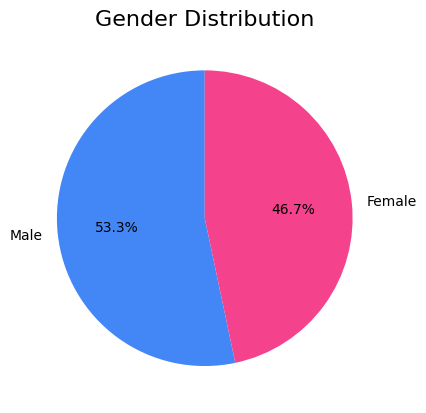

In [38]:
# Define the labels for the genders
gender_labels = ['Male', 'Female']

# Calculate the count of each gender category
gender_counts = df['gender'].value_counts()

# Define custom colors for the pie slices
colors = ['#4287f5', '#f5428d']

# Create a pie chart
plt.pie(gender_counts, labels=gender_labels, autopct='%1.1f%%', colors=colors, startangle=90)

# Add a title and adjust the font size
plt.title('Gender Distribution', fontsize=16)

# Display the chart
plt.show()

**Insights:** The pie chart above reveals a relatively small difference between the male and female categories, with males accounting for 53.3% and females representing 46.7%. This suggests a well-balanced representation of genders within the dataset.This balanced distribution is advantageous for the modeling or analysis that will be conducted, as it reduces the potential for gender-related biases and ensures a more equitable representation of both genders.

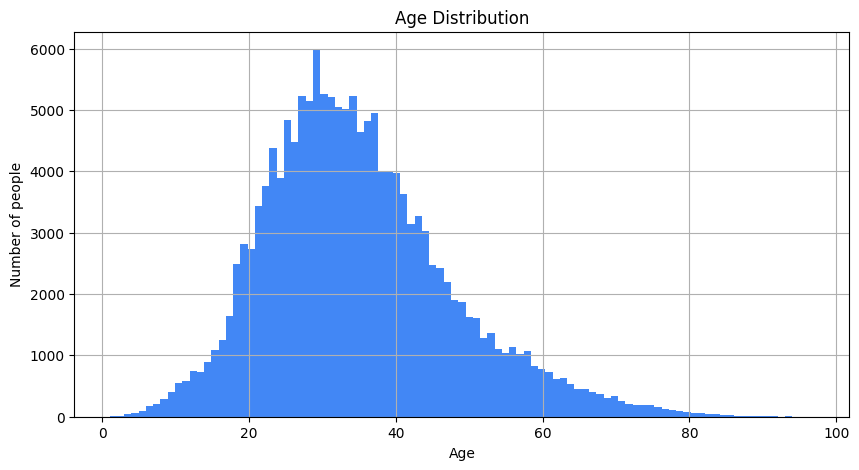

In [39]:
# Plotting a histogram of the 'age' column from the DataFrame 'df'
df['age'].hist(bins=df['age'].nunique(), color='#4287f5', figsize=(10, 5))

# Setting the x-axis label of the plot to 'Age'.
plt.xlabel('Age')

# Setting the y-axis label of the plot to 'Number of people'.
plt.ylabel('Number of people')

# Setting the title of the plot to 'Age Distribution'.
plt.title('Age Distribution')

# Displaying the plot.
plt.show()



**Insights:** Based on the Age Distribution, the graph reveals a substantial concentration of individuals within the 15 to 55 age range, indicating that this age bracket represents the largest proportion of the population in the dataset. This observation suggests that a significant portion of the dataset consists of individuals within this age group.

Additionally, the graph displays a slightly positive skewness. Skewness is a statistical measure that helps determine the symmetry of a distribution. A positive skewness indicates that the tail of the distribution is skewed to the right, meaning there may be a few older individuals beyond the 55 age range.

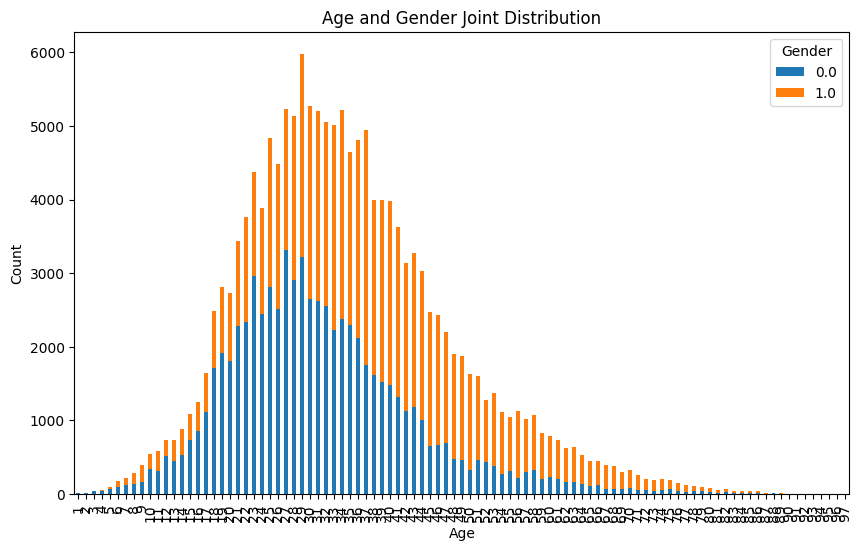

In [49]:
# Grouping the DataFrame 'df' by 'age' and 'gender' columns and counting the occurrences of each combination
age_groups = df.groupby(['age', 'gender']).size().unstack()

# Define custom colors for each gender category
colors = {'male': '#4287f5', 'female': '#f5428d'}

# Plotting the grouped data as a stacked bar chart with custom colors
age_groups.plot(kind='bar', stacked=True, figsize=(10, 6), color=[colors[col] for col in age_groups.columns])

# Adding a label to the x-axis
plt.xlabel('Age')

# Adding a label to the y-axis
plt.ylabel('Count')

# Adding a title to the plot
plt.title('Age and Gender Joint Distribution')

# Adding a legend to the plot with the title 'Gender'
plt.legend(title='Gender')

# Displaying the plot
plt.show()


**Insights:** The above graph shows

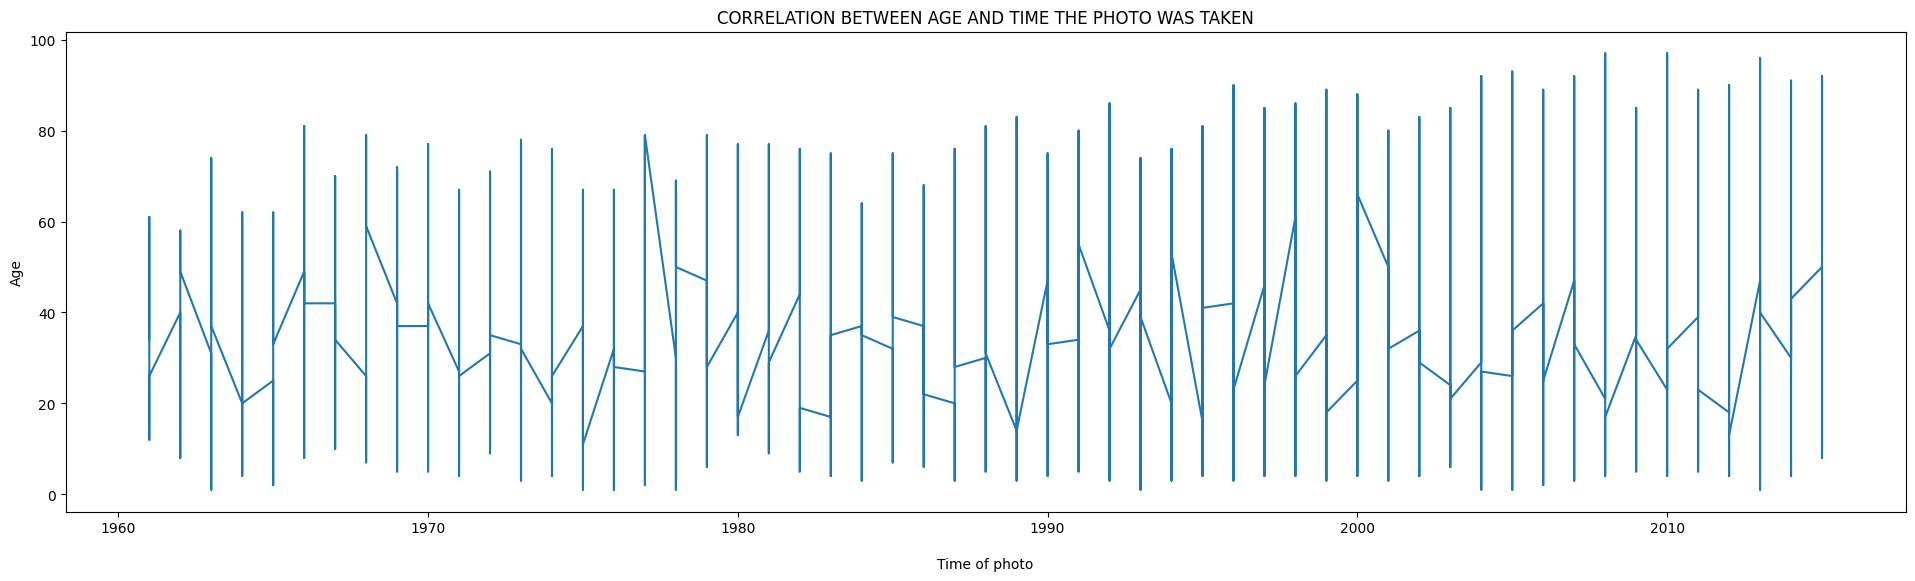

In [40]:
# Sorts the DataFrame 'df' based on the 'photo_taken' column and assigns the sorted DataFrame to the variable 'x'.
x = df.sort_values(by='photo_taken')

# Creates a new figure object 'fig' with a specified figure size.
fig = plt.figure(figsize=(23,6))

# Creates a set of axes within the figure with specified dimensions and positions.
axes = fig.add_axes([0.1,0.1,0.8,0.8])

# Plots the data on the axes, using 'photo_taken' column as the x-axis values and 'age' column as the y-axis values.
axes.plot(x['photo_taken'],x['age'])

# Sets the title of the plot.
plt.title('CORRELATION BETWEEN AGE AND TIME THE PHOTO WAS TAKEN')

# Sets the x-axis label.
plt.xlabel('\nTime of photo')

# Sets the y-axis label.
plt.ylabel('Age')

# Displays the plot.
plt.show()


**Insights:** The above graph shows the presence of individuals from various age groups, irrespective of the time when the photo was taken. However, it does not provide information regarding the number of photos taken for each specific age group. To examine the average age in relation to the year when the photos were taken, we can plot the mean age for each specific year. This allows us to observe how the average age has changed over time.

In [41]:
# Grouping the data in the 'df' dataframe by 'photo_taken', calculating the mean values for each group, and displaying the resulting dataframe 'df_1'.
df_1 = df.groupby('photo_taken').mean().reset_index()

# Displays the mean.
display(df_1)


<ipython-input-41-596fd53455aa>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_1 = df.groupby('photo_taken').mean().reset_index()


,photo_taken,dob,gender,face_score,second_face_score,date_of_birth,age
0,1961,702636.427273,0.618182,3.031511,NaN,1925.218182,35.781818
1,1962,703280.860465,0.620155,2.854594,NaN,1927.023256,34.976744
2,1963,704488.866953,0.626609,3.032450,NaN,1930.343348,32.656652
3,1964,704387.470046,0.645161,2.987130,NaN,1930.036866,33.963134
4,1965,705193.377451,0.573529,3.163054,NaN,1932.259804,32.740196
5,1966,705308.584127,0.638095,3.195369,NaN,1932.590476,33.409524
6,1967,704611.129310,0.620690,2.951937,NaN,1930.663793,36.336207
7,1968,704951.141026,0.685897,2.755144,NaN,1931.641026,36.358974
8,1969,706754.558824,0.613445,3.006656,NaN,1936.516807,32.483193
9,1970,706467.581081,0.628378,3.014990,NaN,1935.750000,34.250000


In [ ]:
# Plot 'photo_taken' on the x-axis and 'age' on the y-axis from the DataFrame df_1, adjusting the figure size to (12, 7), using the color green for the line, and setting the line width to 2.
df_1.plot(x = 'photo_taken', y = 'age', figsize = (12,7), color = 'green', linewidth =2)

# Set the title of the plot to "Photo time vs age plot".
plt.title("Photo time vs age plot")

# Adjust the x-axis labels rotation to 0 degrees (horizontal) to avoid overlapping.
plt.xticks(rotation=0)

# Display the plot.
plt.show()

**Insights:** The above graph shows

In [45]:
# Extract the 'age' column from the DataFrame df and assign it to the variable 'age'.
age = df['age']

# Extract the 'gender' column from the DataFrame df and assign it to the variable 'gender'.
gender = df['gender']

# Calculate the Pearson's correlation coefficient between 'age' and 'gender' using np.corrcoef() function.
correlation = np.corrcoef(age, gender)[0, 1]

# Print the calculated Pearson's correlation coefficient.
print(f"Pearson's correlation coefficient: {correlation}")


Pearson's correlation coefficient: 0.2554386320712445


**Insights:** A Pearson's correlation coefficient of 0.2554386320712445
suggests a weak positive correlation between age and gender in the dataset. The correlation coefficient ranges from -1 to 1, where 1 represents a strong positive correlation, -1 represents a strong negative correlation, and 0 represents no correlation.

In this case, the positive value (0.2542614464083994) indicates a weak positive correlation. It suggests that there is a slight tendency for age and gender to vary together, but the relationship is not very strong. This means that as age increases, there is a slightly higher likelihood of observing a particular gender, but the correlation is not strong enough to make definitive conclusions or predictions based solely on age.

## **Age Estimation Model**
An Age Estimation Model is a machine learning-based system designed to predict the approximate age of an individual based on their facial characteristics. Leveraging advanced techniques like deep learning and computer vision, these models have become increasingly accurate in estimating age from face images. They find applications in various fields, including the Surveillance and Security industry, customer profiling, and digital entertainment. By analyzing facial patterns and features, the Age Estimation Model contributes to a wide range of practical applications, enhancing decision-making processes and providing valuable insights.

Here are the sequential stages in the Age Estimation model:


1.   **Data preparation:** The dataset is shuffled and split into training and validation sets for age estimation model development.

2.   **Data augmentation:** Image data generators are used for data augmentation during training to enhance model generalization.

3.   **Model architecture:** A custom convolutional neural network (CNN) is constructed with multiple layers for age estimation.

4.   **Optimization and training:** The model is compiled with the Adam optimizer and trained using mean squared error (MSE) loss and a learning rate scheduler over 30 epochs.

In [50]:
# Shuffling the DataFrame 'df' and creating a new DataFrame 'df_trial' containing half of the shuffled data, rounding the number of rows if needed.
df = shuffle(df)
df_trial = df[:round(df.shape[0]*0.5)]

# Splitting the shuffled DataFrame 'df_trial' into 'train' and 'val' DataFrames, with approximately 80% for training and 20% for validation.
train = df_trial[:round(df_trial.shape[0]*0.8)]
val = df_trial[round(df_trial.shape[0]*0.8):]

# Printing the number of rows and columns in the 'train' and 'val' DataFrames, respectively.
print(train.shape)
print(val.shape)

(61450, 11)
(15363, 11)


In [52]:
# Defining an image data generator for data augmentation during training, which includes rescaling pixel values, random rotation within 25 degrees,
# random brightness adjustment between 0.7 and 1.3, random zooming up to 50%, and horizontal flipping of images.
train_datagen=ImageDataGenerator(rescale=1./255.,
                           rotation_range=25,
                           brightness_range=[0.7,1.3],
                           zoom_range=0.5,
                           horizontal_flip=True)

# Creating an image data generator for the validation data with pixel value rescaling only.
valid_datagen=ImageDataGenerator(rescale=1./255.)

# Creating a generator 'train_generator' that generates batches of augmented training data from the DataFrame 'train', where 'x_col' represents the file paths of the images,
# 'y_col' corresponds to the age labels, and each batch contains 64 images with a target size of (180,180) pixels.
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train,
    directory='/content/imdb_crop',
    x_col="path",
    y_col="age",
    batch_size=64,
    seed=42,
    shuffle=True,
    class_mode="raw",
    target_size=(180,180))

# Creating another generator 'valid_generator' that generates batches of validation data from the DataFrame 'val', similar to 'train_generator', but this generator is used for the validation set during model training.
valid_generator=valid_datagen.flow_from_dataframe(
    dataframe=val,
    directory="/content/imdb_crop",
    x_col="path",
    y_col="age",
    batch_size=64,
    seed=42,
    shuffle=True,
    class_mode="raw",
    target_size=(180,180))

Found 61450 validated image filenames.
Found 15363 validated image filenames.


In [53]:
# Defining the input shape of the model as (180, 180, 3), representing the dimensions of the input images with three color channels (RGB), and creating an input layer 'inputs' for the age estimation model.
input_shape = (180, 180, 3)
inputs = Input(shape=input_shape)

# Creating a series of layers to extract features from the input images: a 2D convolutional layer with 32 filters of size (3, 3), padding set to 'same', followed by batch normalization, ReLU activation,
# and max-pooling with a pool size of (2, 2). These layers help in identifying patterns and reducing the spatial dimensions of the data.
x = Conv2D(32, (3, 3), padding='same')(inputs)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

# Continuing with the feature extraction process, additional layers are added to further identify complex patterns in the data: a second 2D convolutional layer with 64 filters of size (3, 3), padding set to 'same',
# followed by batch normalization, ReLU activation, and max-pooling with a pool size of (2, 2). These layers help to increase the model's ability to capture more abstract and higher-level features.
x = Conv2D(64, (3, 3), padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

# Continuing the feature extraction, another 2D convolutional layer with 128 filters of size (3, 3) is added, followed by batch normalization, ReLU activation, and max-pooling with a pool size of (2, 2).
# These additional layers further enhance the model's ability to capture intricate patterns and information from the input images.
x = Conv2D(128, (3, 3), padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

# Continuing the feature extraction process, a fourth 2D convolutional layer with 256 filters of size (3, 3) is added, followed by batch normalization, ReLU activation, and max-pooling with a pool size of (2, 2).
# These layers further increase the model's capacity to capture complex patterns and features from the input images, making it more capable of accurately estimating age based on facial characteristics.
x = Conv2D(256, (3, 3), padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

# After the last max-pooling layer, transforming the output into a 1-dimensional vector, adding a dense layer with 512 neurons, followed by batch normalization, ReLU activation, and dropout to improve age estimation model performance.
x = Flatten()(x)
x = Dense(512)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.5)(x)

# Adding additional layers to the model: a dense layer with 256 neurons, followed by batch normalization, ReLU activation, dropout with a rate of 0.5 for regularization,
# and another dense layer with a single neuron for the final age estimation prediction.
x = Dense(256)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.5)(x)
x = Dense(1)(x)

# Creating a complete age estimation model named 'age_model' by specifying the input and output layers.
age_model = Model(inputs=inputs, outputs=x)

In [54]:
# Printing a summary of the 'age_model,' which provides an overview of the model's architecture, layer types, output shapes, and the total number of trainable parameters.
age_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 180, 180, 32)      128       
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 180, 180, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 90, 90, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 64)        18496 

In [ ]:
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
import math

# Defining a learning rate decay function 'step_decay' that reduces the learning rate by a factor of 0.5 every 10 epochs to fine-tune the optimization process during model training.
def step_decay(epoch):
    initial_lrate = 0.01  # Adjust the initial learning rate as needed
    drop = 0.5  # Adjust the drop factor as needed
    epochs_drop = 10.0  # Adjust the number of epochs for learning rate drop as needed
    lrate = initial_lrate * (drop ** (epoch // epochs_drop))
    return lrate

# Creating an Adam optimizer 'opt' with an initial learning rate of 0.0, and preparing a list of callbacks 'callbacks_list' that includes the learning rate scheduler 'lrate,' which adjusts the learning rate during model training based on the 'step_decay' function.
opt = Adam(lr=0.0)
lrate = LearningRateScheduler(step_decay)
callbacks_list = [lrate]

# Compiling the 'age_model' for training with mean squared error (MSE) as the loss function, using the 'opt' Adam optimizer with the learning rate defined earlier, and evaluating the model's performance using mean absolute error (MAE) and mean squared error (MSE) metrics during training.
age_model.compile(loss='mse', optimizer=opt, metrics=['mae','mse'])

# Calculating the number of batches in the training and validation datasets by determining the length of 'train_generator' and 'valid_generator', respectively, and assigning these values to 'STEP_SIZE_TRAIN' and 'STEP_SIZE_VALID' variables for later use in the training process.
STEP_SIZE_TRAIN = len(train_generator)
STEP_SIZE_VALID = len(valid_generator)

# Training the 'age_model' using the 'train_generator' as the training data, 'valid_generator' as the validation data, with 'STEP_SIZE_TRAIN' and 'STEP_SIZE_VALID' determining the number of steps per epoch for training and validation,
# respectively, utilizing the 'callbacks_list' to adjust the learning rate, and training for 30 epochs. The training progress and evaluation results are stored in the 'history' variable.
history = age_model.fit(
    train_generator,
    steps_per_epoch=STEP_SIZE_TRAIN,
    validation_data=valid_generator,
    validation_steps=STEP_SIZE_VALID,
    callbacks=callbacks_list,
    epochs=30
)

Epoch 1/30
961/961 [==============================] - 924s 953ms/step - loss: 177.3024 - mae: 10.3690 - mse: 177.3024 - val_loss: 161.4453 - val_mae: 9.9082 - val_mse: 161.4453 - lr: 0.0100
Epoch 2/30
961/961 [==============================] - 802s 834ms/step - loss: 158.0477 - mae: 9.7475 - mse: 158.0477 - val_loss: 139.6751 - val_mae: 9.1470 - val_mse: 139.6751 - lr: 0.0100
Epoch 3/30
961/961 [==============================] - 840s 874ms/step - loss: 146.1982 - mae: 9.3624 - mse: 146.1982 - val_loss: 165.7835 - val_mae: 10.4645 - val_mse: 165.7835 - lr: 0.0100
Epoch 4/30
961/961 [==============================] - 814s 847ms/step - loss: 136.3558 - mae: 9.0131 - mse: 136.3558 - val_loss: 127.4743 - val_mae: 8.6010 - val_mse: 127.4743 - lr: 0.0100
Epoch 5/30
961/961 [==============================] - 948s 987ms/step - loss: 131.4599 - mae: 8.8394 - mse: 131.4599 - val_loss: 119.3257 - val_mae: 8.3141 - val_mse: 119.3257 - lr: 0.0100
Epoch 6/30
961/961 [==============================] -

In [ ]:
age_model.save('/content/drive/My Drive/Colab Notebooks/1')
age_model.save('/content/drive/My Drive/Colab Notebooks/1.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
import plotly.graph_objects as go

plt.clf()

fig = go.Figure()
fig.add_trace(go.Scatter(
                    y=history.history['loss'],
                    name='Train'))

fig.add_trace(go.Scatter(
                    y=history.history['val_loss'],
                    name='Validation'))


fig.update_layout(height=500,
                  width=700,
                  title='Train vs Val Total loss',
                  xaxis_title='Epoch',
                  yaxis_title='Loss')


fig.show()

<Figure size 640x480 with 0 Axes>